In [1]:
# 核支持向量机(SVM) 是可以推广到更复杂模型的扩展，这些模型无法被输入空间的超平面定义

In [2]:
# 线性模型与非线性特征
# 线性模型在低维空间中可能非常所限，因为线和平面的灵活性有限，
# 添加更多的特征可以让线性模型更加灵活，添加输入特征的交互项或多项式

Text(0, 0.5, 'Feature 1')

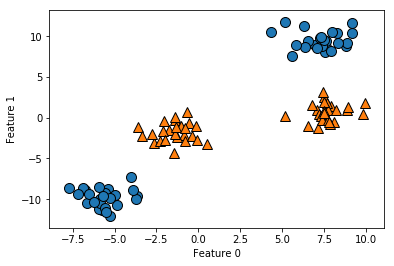

In [1]:
%matplotlib inline
import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/home/susu/.virtualenvs/ml3/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

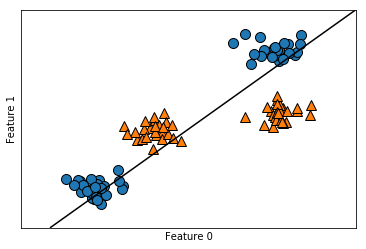

In [2]:
# 使用线性模型支持向量机对该数据进行建模
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

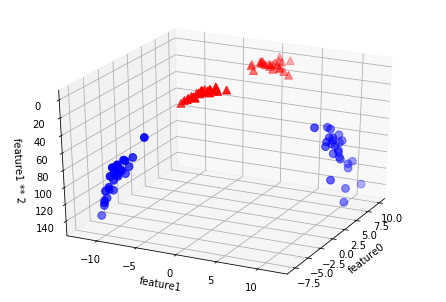

In [3]:
# 用于分类的线性模型只能用一条直线来划分数据点，对这个数据集无法给出较好的结果
# 对特征进行扩展，将二维数据扩展为三维数据，绘制三维散点图
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:,1:]**2])
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/home/susu/.virtualenvs/ml3/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

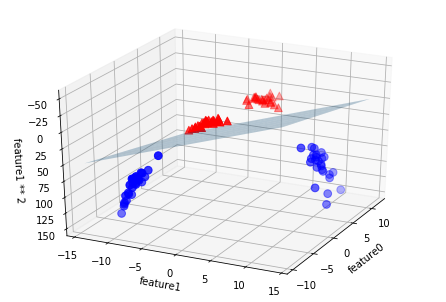

In [5]:
# 使用线性模型(三维空间中的平面)划分新的数据集
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")


Text(0, 0.5, 'Feature 1')

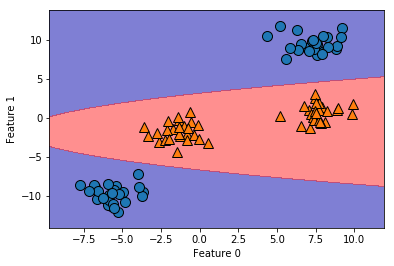

In [6]:
# 此时线性SVM模型得决策边界已经不是一条直线了，而是一个椭圆
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [37]:
# 向数据表示中添加非线性特征，可以让线性模型变得强大，但是添加合适的特征很难直接操作，
# 可以使用一种数学技巧(核技巧)来做处理
# 核技巧 直接计算可扩展特征表示中数据点之间的距离(内积)，而不是实际扩展进行计算
# 对于支持向量机，将数据映射到更高维空间中有两种常用方法：
# 一是多项式核：在一定阶数内计算原始特征所有可能的多项式
# 二是径向基函数核(高斯核)：RBF考虑所有阶数的所有可能多项式，但阶数越高，特征重要性越小

In [38]:
# 支持向量：位于类别之间边界上的那些点，这些点对于定义决策边界来说很重要
# 对新的样本点进行预测，需要测量它和每个支持向量之间的距离
# 分类决策基于它与支持向量之间的距离以及在训练过程中学到的支持向量的重要性来得出

Text(0, 0.5, 'Feature 1')

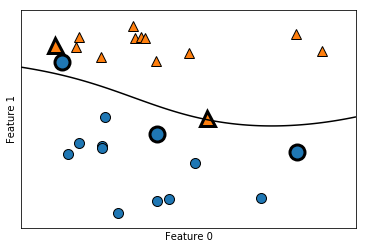

In [7]:
# 支持向量可视化展示，支持向量重要性保存在svc的dual_coef_属性中
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

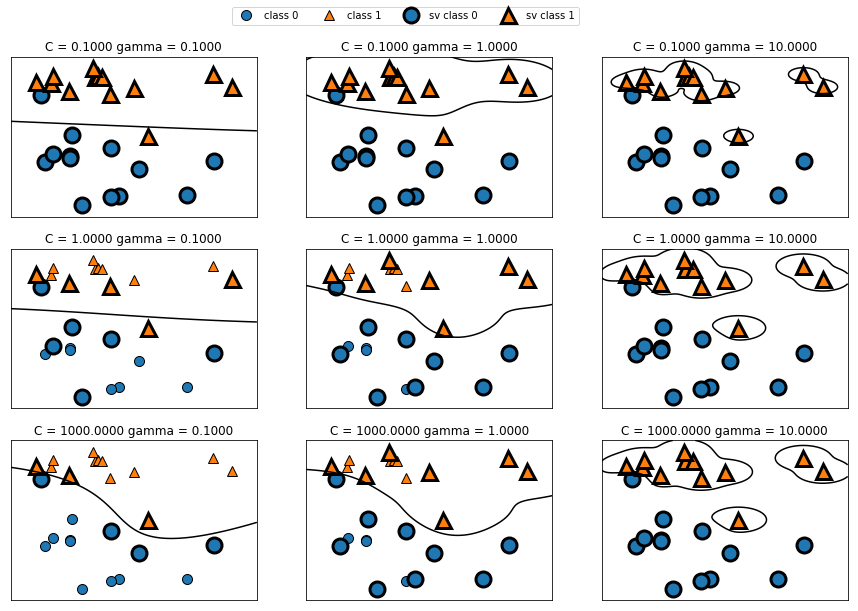

In [8]:
# gamma参数用于控制高斯核的宽度，它决定了点与点之间“靠近”是指多大的距离，默认值 1,
# C参数是正则化参数，它限制每个点的重要性(dual_coef_)，默认值 1/n_features
fig, axes = plt.subplots(3, 3, figsize=(15,10))
for ax, C in zip(axes, [-1, 0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [ ]:
# gamma越小，高斯核半径越大
# C越小，正则化越强

In [9]:
# 乳腺癌数据训练RBF核SVM
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


/home/susu/.virtualenvs/ml3/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


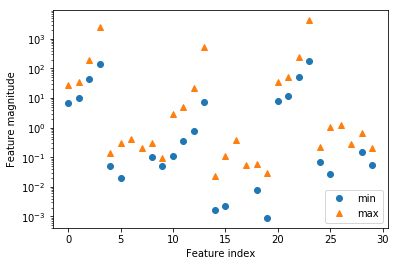

In [46]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [10]:
# 核SVM对数据进行缩放，将每个特征缩放到0和1之间
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training)/range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [13]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.948
Accuracy on test set:0.951


/home/susu/.virtualenvs/ml3/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
# 减小正则化，提升拟合程度
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.972


/home/susu/.virtualenvs/ml3/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [15]:
# SVM在低维和高维数据上的表现都很好，
# 但是对样本个数的缩放表现不好，数据量较大时运行时间和内存可能会面临挑战